# Proof of Concept for loading and plotting data

In [18]:
import matplotlib.pyplot as plt; plt.style.use('seaborn-v0_8')
import numpy as np
from dql.utils.datamanager import ConcatDataManager
from scipy.signal import savgol_filter

In [19]:
CDM = ConcatDataManager('test')

In [20]:
rewards = CDM.loadRewards()
avgRewards = np.mean(rewards, axis=0)

actions = CDM.loadActions()
normAction0 =  (actions / np.sum(actions, axis=2, keepdims=True))[:, :, 0]
actionBiases = np.abs(normAction0 - .5) * 2

losses = CDM.loadLosses()
avgLosses = np.mean(losses, axis=0)

summary = CDM.loadSummary()

In [21]:
def smooth(arr: np.ndarray, window: int = None) -> np.ndarray:
    if window is None:
        window = arr.shape[0] // 10 + 1
    return savgol_filter(arr, window, 3)

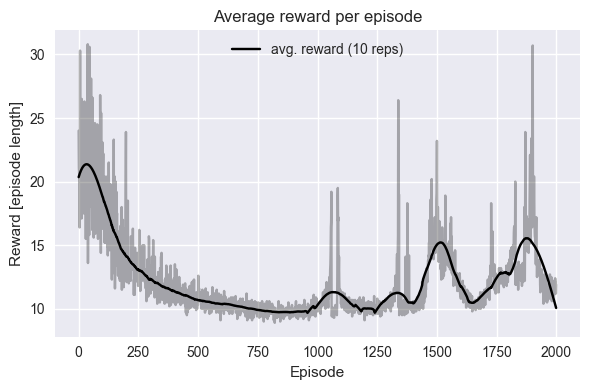

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(avgRewards, color='k', alpha=0.3)
ax.plot(smooth(avgRewards), color='k', label=f'avg. reward ({summary.meta.numRepetitions} reps)')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward [episode length]')
ax.set_title('Average reward per episode')
ax.legend()
fig.tight_layout();

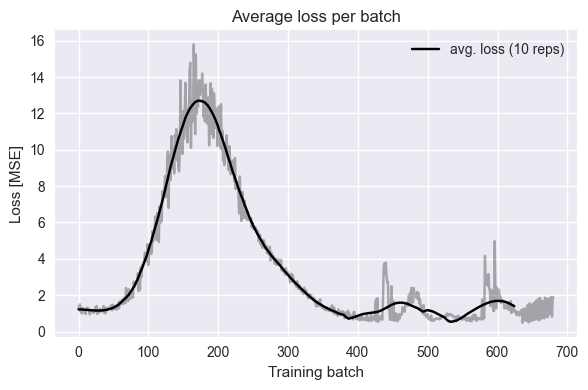

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(avgLosses, color='k', alpha=0.3)
ax.plot(smooth(avgLosses), color='k', label=f'avg. loss ({summary.meta.numRepetitions} reps)')
ax.set_xlabel('Training batch')
ax.set_ylabel('Loss [MSE]')
ax.set_title('Average loss per batch')
ax.legend()
fig.tight_layout();

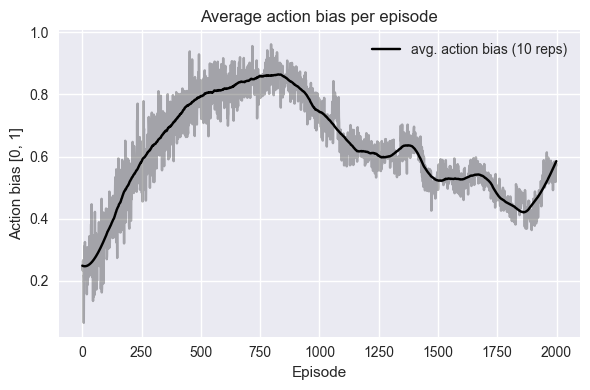

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.mean(actionBiases, axis=0), color='k', alpha=0.3)
ax.plot(smooth(np.mean(actionBiases, axis=0)), color='k', label=f'avg. action bias ({summary.meta.numRepetitions} reps)')
ax.set_xlabel('Episode')
ax.set_ylabel('Action bias [0, 1]')
ax.set_title('Average action bias per episode')
ax.legend()
fig.tight_layout();